## lab 3


In [85]:
from skimage import morphology 
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

path_bin_image = 'img1.png'
image = np.array(np.invert(Image.open(path_bin_image))) [:,:,1] > 100


In [96]:

square = morphology.square(3) # gives the `chessboard' distance transform
disk = morphology.disk(5)  #  Euclidean distance transform
diamond = morphology.diamond(10) 

- multiple successive erosions with a suitable structuring element until all foreground regions of the image have been eroded away.
- if each pixel is labeled with the number of erosions that had to be performed before it disappeared, then this is just the distance transform. 


In [94]:
def build_dist(image,struct, show_proc = False):
    dist = [[0 for i in range(len(image[0]))] for j in range(len(image))]
    erode = ski_mph.erosion(image, struct)
    process = 0 
    while np.count_nonzero(erode):
        dist += erode
        erode = ski_mph.erosion(erode, struct)
        if show_proc & (process % 50 == 0) :
            plt.imshow(dist, cmap=cm.binary)
            plt.show()
        process += 1
    return dist

In [93]:
def plot(img,dist1, dist2, dist3,name1 = 'dist1',name2 = 'dist2', name3 = 'dist3'):
    fig, ((ax0, ax1), (ax2, ax3) )= plt.subplots(nrows=2, ncols=2, figsize=(30, 10))

    ax0.imshow(img, cmap=cm.binary)
    ax0.set_xlabel("origin")

    ax1.imshow(dist1,cmap=cm.binary)
    ax1.set_xlabel(name1)

    ax2.imshow(dist2, cmap=cm.binary)
    ax2.set_xlabel(name2)


    ax3.imshow(dist3, cmap=cm.binary)
    ax3.set_xlabel(name3)

    fig.tight_layout()
    plt.show()

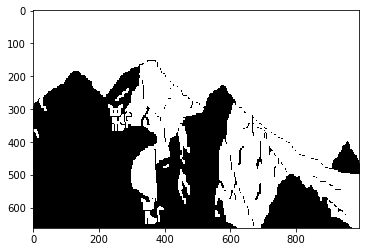

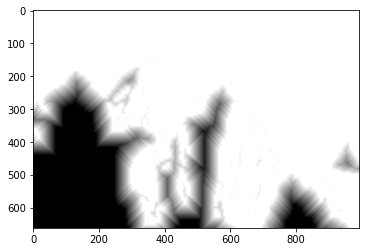

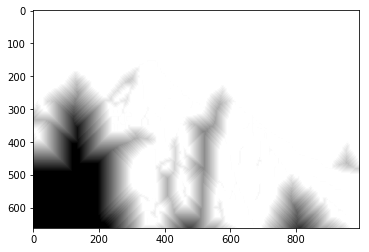

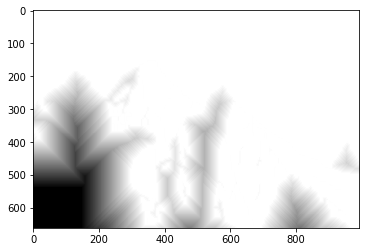

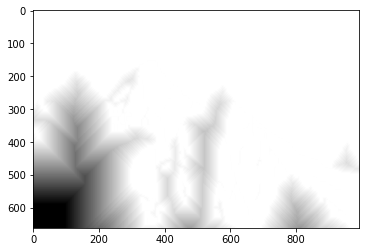

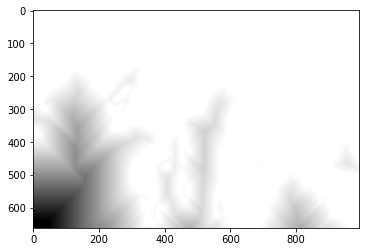

In [95]:
dist_square = build_dist(image,square, show_proc = True)

In [97]:
dist_diamond = build_dist(image,diamond)
dist_disk = build_dist(image,disk)

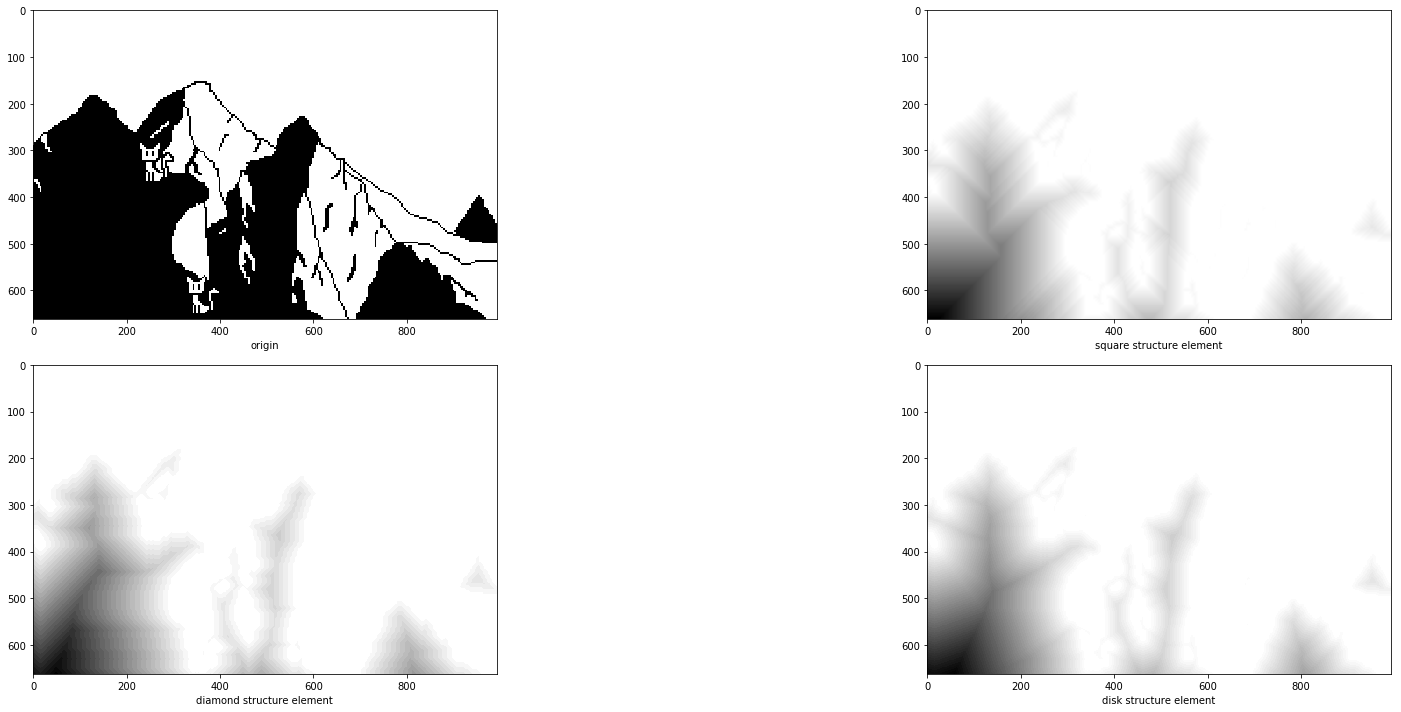

In [98]:
plot(image,dist_square,dist_diamond,dist_disk,name1 = 'square structure element',
                                              name2 = 'diamond structure element',
                                              name3 = 'disk structure element')

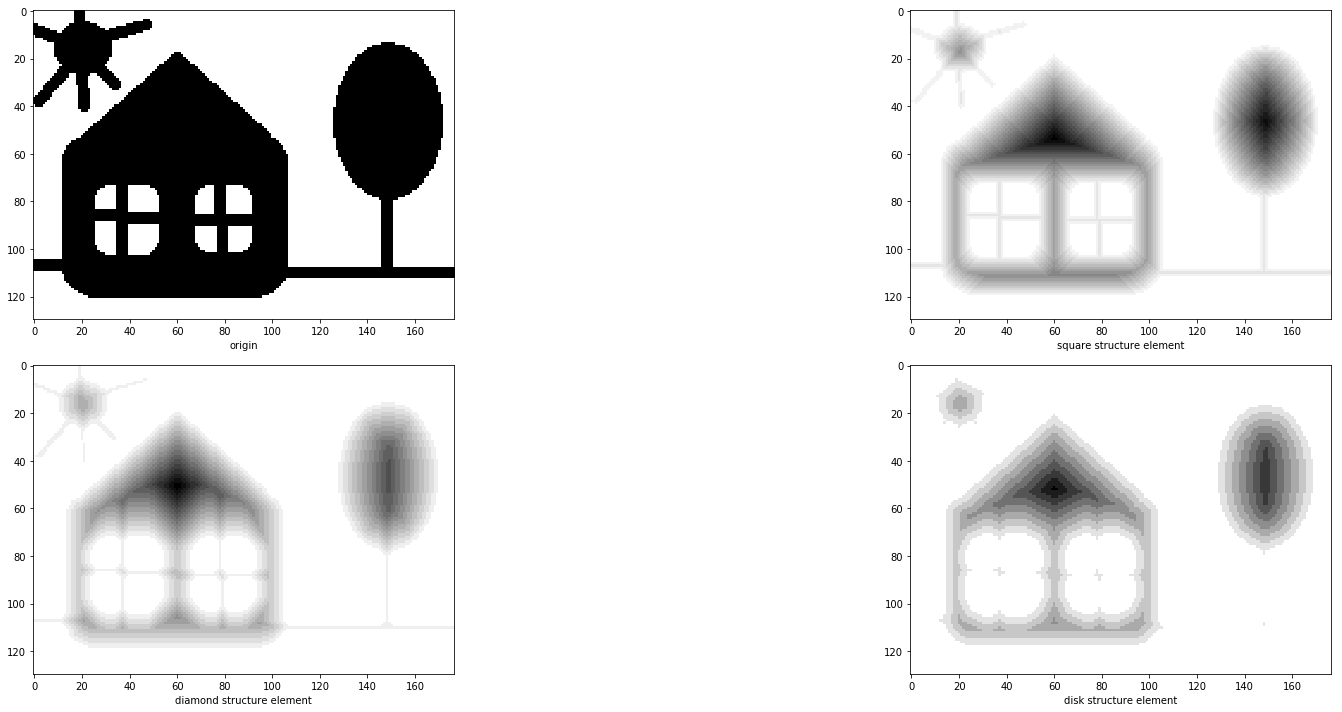

In [105]:
path_bin_image = 'i3.jpg'
image = np.array(np.invert(Image.open(path_bin_image))) [:,:,1] > 100


square = morphology.square(3) # gives the `chessboard' distance transform
disk = morphology.disk(3)  #  Euclidean distance transform
diamond = morphology.diamond(2) 

dist_square = build_dist(image,square)
dist_diamond = build_dist(image,diamond)
dist_disk = build_dist(image,disk)
plot(image,dist_square,dist_diamond,dist_disk,name1 = 'square structure element',
                                              name2 = 'diamond structure element',
                                              name3 = 'disk structure element')